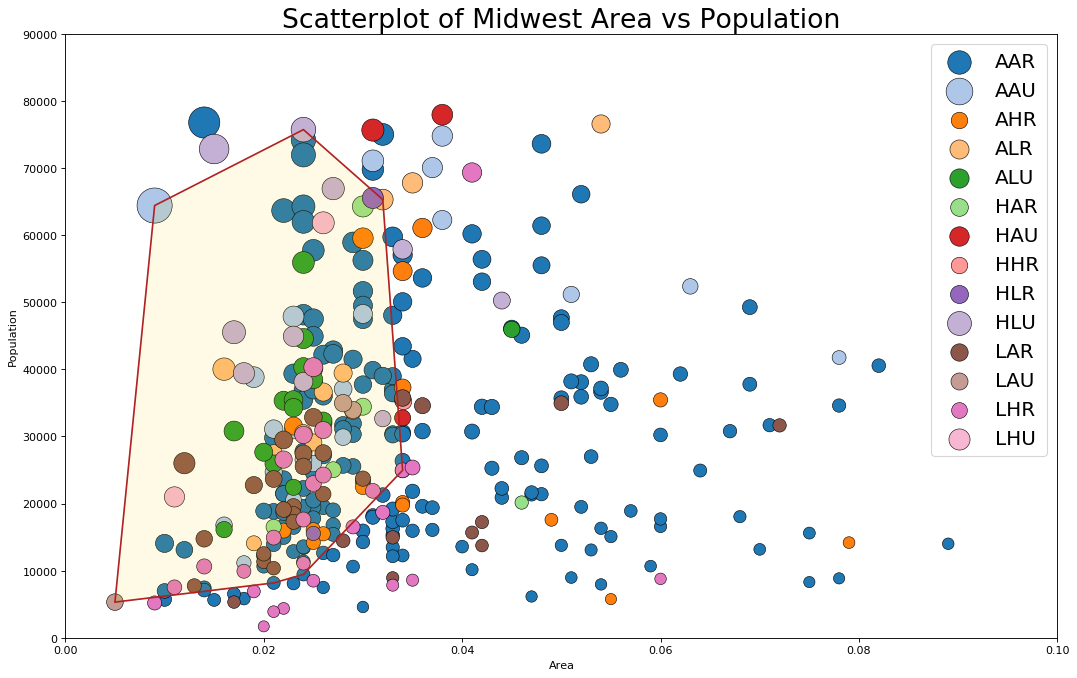

In [1]:
# Import module
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import seaborn as sns

%matplotlib inline

# Import dataset
data_path = "../../data/midwest_filter.csv"
midwest = pd.read_csv(data_path)

# Step 1: Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
# plt.cm.tab20
# https://www.osgeo.cn/matplotlib/tutorials/colors/colormaps.html
# https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
colors = [np.array(plt.cm.tab20(i)).reshape(1, -1) 
          for i in range(len(categories))]

# Draw Plot for Each Category
# figsize - tuple of integers , 指定figure的宽和高，单位为英寸 ，
# 若无提供，defaults to rc figure.figsize.
# dpi - 图形的分辨率
# faceclor - 背景色，若缺省，则 defaults to rc figure.facecolor.
# edgecolor - 边框颜色，若缺省，则 defaults to rc figure.edgecolor.
plt.figure(figsize=(16, 10), dpi= 80, 
           facecolor='w', edgecolor='k')

# Step 2: Draw Scatterplot with unique color for each category
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s='dot_size', c=colors[i], label=str(category), 
                edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x, y, ax=None, **kw):
    # # plt.gca(): 返回当前axes(matplotlib.axes.Axes)
    if not ax: ax=plt.gca()
    # 行连接两个矩阵，就是把两矩阵左右相加，要求行数相等
    p = np.c_[x, y]
    # https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.spatial.ConvexHull.html
    hull = ConvexHull(p)
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Polygon.html
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled   选择要环绕的数据    
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices   绘制围绕顶点的多边形
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, 
         ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, 
         ec="firebrick", fc="none", linewidth=1.5)    


# Step 4: Decorations
# 横纵坐标的刻度及标签大小
params = {
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'axes.titlesize': 24
}
plt.rcParams.update(params)

# plt.gca(): 返回当前axes(matplotlib.axes.Axes)
# 横纵坐标的刻度及标签
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')


plt.title("Scatterplot of Midwest Area vs Population", fontsize=24)
plt.legend(fontsize=18)    
#plt.savefig("./img/Python/2-Encircling.png", bbox_inches="tight")
plt.show()